# Weather Pattern Clustering

The weather datasets downloaded from NREL contain measurements of 19 different attributes taken at half-hour increments from various locations in and arround Pittsburgh, PA. I will attempt to explore these datasets through visualization first, and then through clustering. The ultimate goal is to be able to predict how weather patterns change, specifically GHI for solar power production. 

First, I will analyze just the Pittsburgh weather and time data.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle

# Load Pittsburgh-only data
with open('PIT_dict.pkl', 'rb') as f:
    PIT_dict = pickle.load(f)

PIT_df = PIT_dict['complete_data']
# Use only the weather-related columns, not time
cols = list(PIT_df.columns)


PIT_weather = PIT_df[cols].copy()

PIT_weather.head()


,Time_X,Time_Y,Day_X,Day_Y,PIT_DHI,PIT_DNI,PIT_GHI,PIT_Clearsky DHI,PIT_Clearsky DNI,PIT_Clearsky GHI,PIT_Dew Point,PIT_Surface Albedo,PIT_Wind_X,PIT_Wind_Y,PIT_Relative Humidity,PIT_Temperature,PIT_Pressure,PIT_Global Horizontal UV Irradiance (280-400nm),PIT_Global Horizontal UV Irradiance (295-385nm)
0,0.000000,1.000000,0.017213,0.999852,0,0,0,0,0,0,-14.0,0.866,-0.524772,-0.290886,81.30,-11.0,990,0.0,0.0
1,0.130526,0.991445,0.017213,0.999852,0,0,0,0,0,0,-14.0,0.866,-0.524772,-0.290886,81.32,-11.0,990,0.0,0.0
2,0.258819,0.965926,0.017213,0.999852,0,0,0,0,0,0,-14.0,0.866,-0.508829,-0.317952,79.56,-11.0,990,0.0,0.0
3,0.382683,0.923880,0.017213,0.999852,0,0,0,0,0,0,-14.0,0.866,-0.508829,-0.317952,79.57,-11.0,990,0.0,0.0
4,0.500000,0.866025,0.017213,0.999852,0,0,0,0,0,0,-14.0,0.866,-0.430146,-0.418299,78.91,-12.0,990,0.0,0.0


Now I will look at the correlations between each column and then remove one of every two columns which have a correlation greater than 0.95 between them.

In [18]:
corr = PIT_weather.corr()
corr

,Time_X,Time_Y,Day_X,Day_Y,PIT_DHI,PIT_DNI,PIT_GHI,PIT_Clearsky DHI,PIT_Clearsky DNI,PIT_Clearsky GHI,PIT_Dew Point,PIT_Surface Albedo,PIT_Wind_X,PIT_Wind_Y,PIT_Relative Humidity,PIT_Temperature,PIT_Pressure,PIT_Global Horizontal UV Irradiance (280-400nm),PIT_Global Horizontal UV Irradiance (295-385nm)
Time_X,1.000000e+00,3.700729e-17,-4.470169e-18,-4.464771e-18,-0.074965,-0.049157,-0.064789,-0.082888,-0.072622,-0.073546,-0.052457,1.024546e-17,0.039567,-0.044915,0.206283,-0.134640,0.046917,-0.062085,-0.061976
Time_Y,3.700729e-17,1.000000e+00,2.036644e-18,2.445463e-18,-0.729733,-0.581645,-0.720895,-0.803037,-0.895857,-0.837862,-0.002871,1.522043e-17,0.102929,0.007549,0.620450,-0.260143,0.002186,-0.700780,-0.699574
Day_X,-4.470169e-18,2.036644e-18,1.000000e+00,-2.641043e-17,0.061801,-0.015773,0.029884,0.083559,0.028914,0.062470,-0.246783,2.003478e-01,-0.181905,-0.021866,0.103655,-0.284838,-0.092027,0.031805,0.031998
Day_Y,-4.464771e-18,2.445463e-18,-2.641043e-17,1.000000e+00,-0.269574,-0.153451,-0.282085,-0.262357,-0.127156,-0.267833,-0.776137,4.379550e-01,-0.255425,-0.100215,0.131428,-0.795017,0.109945,-0.291357,-0.292126
PIT_DHI,-7.496546e-02,-7.297328e-01,6.180121e-02,-2.695735e-01,1.000000,0.377491,0.733204,0.847844,0.768282,0.866191,0.211782,-8.543919e-02,-0.040356,0.012269,-0.567217,0.434607,-0.061562,0.739780,0.739696
PIT_DNI,-4.915723e-02,-5.816452e-01,-1.577326e-02,-1.534505e-01,0.377491,1.000000,0.850507,0.461158,0.712300,0.630621,0.025416,-6.187142e-02,-0.024009,0.044345,-0.684879,0.324827,0.143100,0.771934,0.770293
PIT_GHI,-6.478891e-02,-7.208954e-01,2.988418e-02,-2.820848e-01,0.733204,0.850507,1.000000,0.721002,0.825390,0.892642,0.152216,-1.046049e-01,-0.019475,0.038610,-0.754335,0.475925,0.048206,0.959560,0.959361
PIT_Clearsky DHI,-8.288769e-02,-8.030374e-01,8.355925e-02,-2.623566e-01,0.847844,0.461158,0.721002,1.000000,0.803645,0.882743,0.228612,-6.492020e-02,-0.052251,0.008076,-0.540026,0.439601,-0.094738,0.728986,0.728399
PIT_Clearsky DNI,-7.262178e-02,-8.958567e-01,2.891407e-02,-1.271560e-01,0.768282,0.712300,0.825390,0.803645,1.000000,0.917468,0.054479,-5.418434e-02,-0.086817,0.028794,-0.722180,0.353599,0.016155,0.795526,0.793996
PIT_Clearsky GHI,-7.354553e-02,-8.378620e-01,6.246983e-02,-2.678327e-01,0.866191,0.630621,0.892642,0.882743,0.917468,1.000000,0.172471,-1.009607e-01,-0.048371,0.030250,-0.709215,0.466940,-0.036121,0.890524,0.890439


In [19]:
columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = PIT_weather.columns[columns]
PIT_weather = PIT_weather[selected_columns]
PIT_weather.head()

,Time_X,Time_Y,Day_X,Day_Y,PIT_DHI,PIT_DNI,PIT_GHI,PIT_Clearsky DHI,PIT_Clearsky DNI,PIT_Dew Point,PIT_Surface Albedo,PIT_Wind_X,PIT_Wind_Y,PIT_Relative Humidity,PIT_Pressure
0,0.000000,1.000000,0.017213,0.999852,0,0,0,0,0,-14.0,0.866,-0.524772,-0.290886,81.30,990
1,0.130526,0.991445,0.017213,0.999852,0,0,0,0,0,-14.0,0.866,-0.524772,-0.290886,81.32,990
2,0.258819,0.965926,0.017213,0.999852,0,0,0,0,0,-14.0,0.866,-0.508829,-0.317952,79.56,990
3,0.382683,0.923880,0.017213,0.999852,0,0,0,0,0,-14.0,0.866,-0.508829,-0.317952,79.57,990
4,0.500000,0.866025,0.017213,0.999852,0,0,0,0,0,-14.0,0.866,-0.430146,-0.418299,78.91,990


This process removed 4 columns.

## Data Visualization

I will now look at the distribution of a select few attributes.

In [21]:
# Get min and max values for each attribute of interest
DHI_min = PIT_weather["PIT_DHI"].min()
DNI_min = PIT_weather["PIT_DNI"].min()
GHI_min = PIT_weather["PIT_GHI"].min()
DHI_max = PIT_weather["PIT_DHI"].max()
DNI_max = PIT_weather["PIT_DNI"].max()
GHI_max = PIT_weather["PIT_GHI"].max()

Wind_X_min = PIT_weather["PIT_Wind_X"].min()
Wind_Y_min = PIT_weather["PIT_Wind_Y"].min()
Wind_X_max = PIT_weather["PIT_Wind_X"].max()
Wind_Y_max = PIT_weather["PIT_Wind_Y"].max()

DP_min = PIT_weather["PIT_Dew Point"].min()
RH_min = PIT_weather["PIT_Relative Humidity"].min()
DP_max = PIT_weather["PIT_Dew Point"].max()
RH_max = PIT_weather["PIT_Relative Humidity"].max()



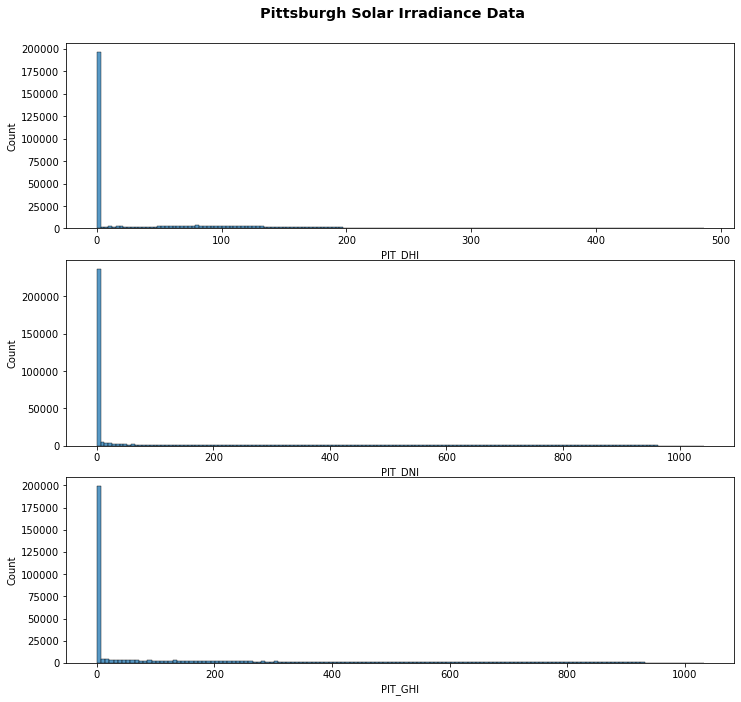

In [26]:
fig, axs = plt.subplots(nrows=3, figsize=(10,10))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Pittsburgh Solar Irradiance Data', weight='bold', size='x-large')

sns.histplot(data=PIT_weather, x='PIT_DHI', ax=axs[0])
sns.histplot(data=PIT_weather, x='PIT_DNI', ax=axs[1])
sns.histplot(data=PIT_weather, x='PIT_GHI', ax=axs[2])
plt.show()

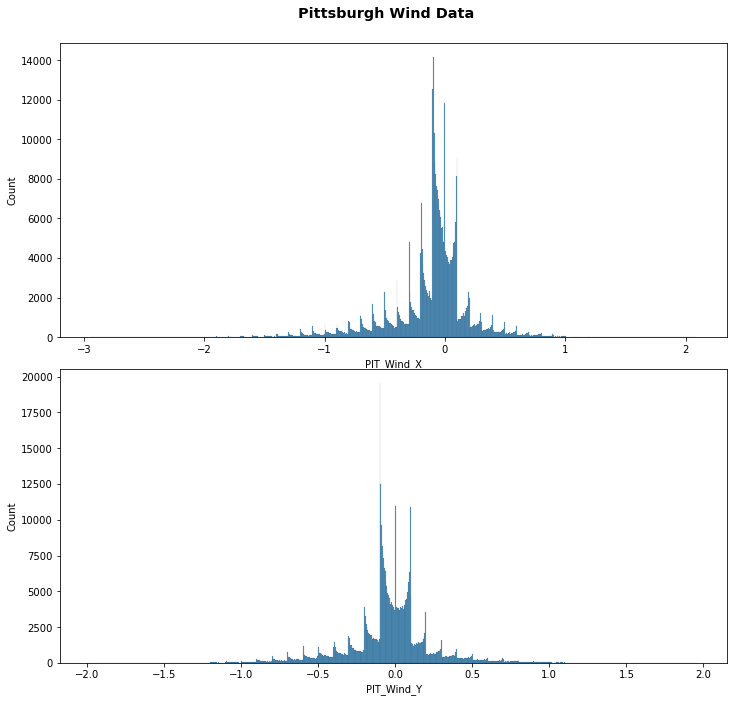

In [27]:
fig, axs = plt.subplots(nrows=2, figsize=(10,10))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Pittsburgh Wind Data', weight='bold', size='x-large')

sns.histplot(data=PIT_weather, x='PIT_Wind_X', ax=axs[0])
sns.histplot(data=PIT_weather, x='PIT_Wind_Y', ax=axs[1])
plt.show()

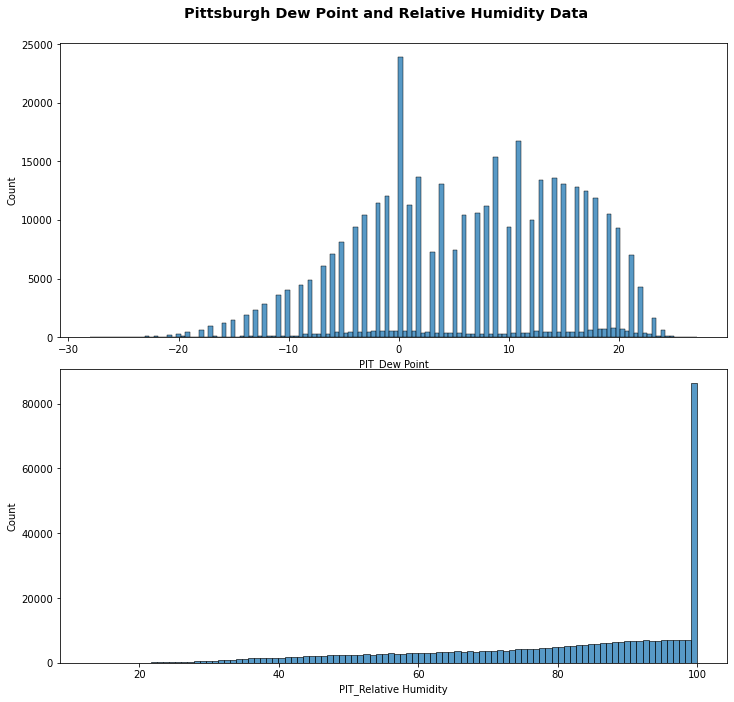

In [30]:
fig, axs = plt.subplots(nrows=2, figsize=(10,10))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Pittsburgh Dew Point and Relative Humidity Data', weight='bold', size='x-large')

sns.histplot(data=PIT_weather, x='PIT_Dew Point', ax=axs[0])
sns.histplot(data=PIT_weather, x='PIT_Relative Humidity', ax=axs[1])
plt.show()

Some features to take note of in these distributions are first, the very high prominence of zero values in all of the solar irradiance data columns. These are largely due to measurements made at night. 

The wind data has an interesting bimodal distribution with most of the data showing wind from the west and the south.

The dew point has a sharp peak at 0 while the relative humidity has an even sharper peak at 100. These seem to be due to incorrectly recorded data as these peaks don't seem to make much sense. However, it would be difficult to sort out the correct data from the erroneous data so I will leave it be for now. 

# Clustering

Now I will attempt to cluster the Pittsburgh weather and time data into discrete groups. First, the data needs to all be adjusted to be on similar scales. We don't want one feature having a range of 1000 and another a range of 100. I will use a simple min-max scaler to bring all data between 0 and 1.

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_PIT_weather = scaler.fit_transform(PIT_weather)

Now it's time to cluster the data. To select the number of clusters, I will use the elbow method. The KMeans algorithm will be applied multiple times, with different k values each time and the inertia value for each iteration saved. These inertia values will then be plotted to see where the inertia starts leveling off.

In [32]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []

K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(scaled_PIT_weather)
    sum_of_squared_distances.append(k_means.inertia_)

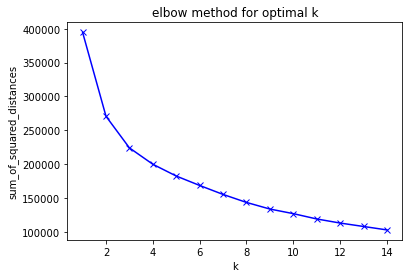

In [33]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

From this plot, it appears that a k value of 4 may be the optimal selection.

I will display the centers of each of these clusters below.

In [34]:
k_means = KMeans(n_clusters=4, random_state=15217)
model = k_means.fit(scaled_PIT_weather)
centers = scaler.inverse_transform(model.cluster_centers_)


In [35]:
#function that creates a dataframe with a column for cluster number
def pd_centers(cols_of_interest, centers):
        colNames = list(cols_of_interest)
        colNames.append('prediction')
# Zip with a column called 'prediction' (index)
        Z = [np.append(A, index) for index, A in enumerate(centers)]
# Convert to pandas data frame for plotting
        P = pd.DataFrame(Z, columns=colNames)
        P['prediction'] = P['prediction'].astype(int)
        return P
P = pd_centers(PIT_weather.columns, centers)
P

,Time_X,Time_Y,Day_X,Day_Y,PIT_DHI,PIT_DNI,PIT_GHI,PIT_Clearsky DHI,PIT_Clearsky DNI,PIT_Dew Point,PIT_Surface Albedo,PIT_Wind_X,PIT_Wind_Y,PIT_Relative Humidity,PIT_Pressure,prediction
0,-0.609137,0.548532,-0.072036,-0.070291,9.012549,20.593328,12.399778,12.359550,54.969582,8.465299,0.114635,-0.059630,-0.034581,88.785148,980.621361,0
1,-0.085371,-0.754341,-0.031500,-0.244313,178.504802,431.543038,447.128540,132.833955,739.360559,8.700670,0.123719,-0.111843,-0.032001,60.053494,980.905756,1
2,0.769788,0.345687,-0.068293,-0.066914,11.840916,26.954937,16.589922,16.198738,78.689068,7.438394,0.114604,-0.049938,-0.058608,93.987538,980.840805,2
3,0.002875,0.019339,0.334768,0.811723,43.894498,108.103135,84.581925,41.849439,246.766130,-6.586743,0.857733,-0.362251,-0.038611,81.467981,981.416090,3


It appears that the solar irradiance is a large factor in separating these clusters. Let's find the assigned cluster of each datapoint and inspect the distribution of the same attributes viewed before for each cluster.

In [36]:
predict = model.predict(scaled_PIT_weather)
predict = pd.Series(predict, index=PIT_weather.index)
PIT_weather['Cluster'] = predict
PIT_weather.head()

,Time_X,Time_Y,Day_X,Day_Y,PIT_DHI,PIT_DNI,PIT_GHI,PIT_Clearsky DHI,PIT_Clearsky DNI,PIT_Dew Point,PIT_Surface Albedo,PIT_Wind_X,PIT_Wind_Y,PIT_Relative Humidity,PIT_Pressure,Cluster
0,0.000000,1.000000,0.017213,0.999852,0,0,0,0,0,-14.0,0.866,-0.524772,-0.290886,81.30,990,3
1,0.130526,0.991445,0.017213,0.999852,0,0,0,0,0,-14.0,0.866,-0.524772,-0.290886,81.32,990,3
2,0.258819,0.965926,0.017213,0.999852,0,0,0,0,0,-14.0,0.866,-0.508829,-0.317952,79.56,990,3
3,0.382683,0.923880,0.017213,0.999852,0,0,0,0,0,-14.0,0.866,-0.508829,-0.317952,79.57,990,3
4,0.500000,0.866025,0.017213,0.999852,0,0,0,0,0,-14.0,0.866,-0.430146,-0.418299,78.91,990,3


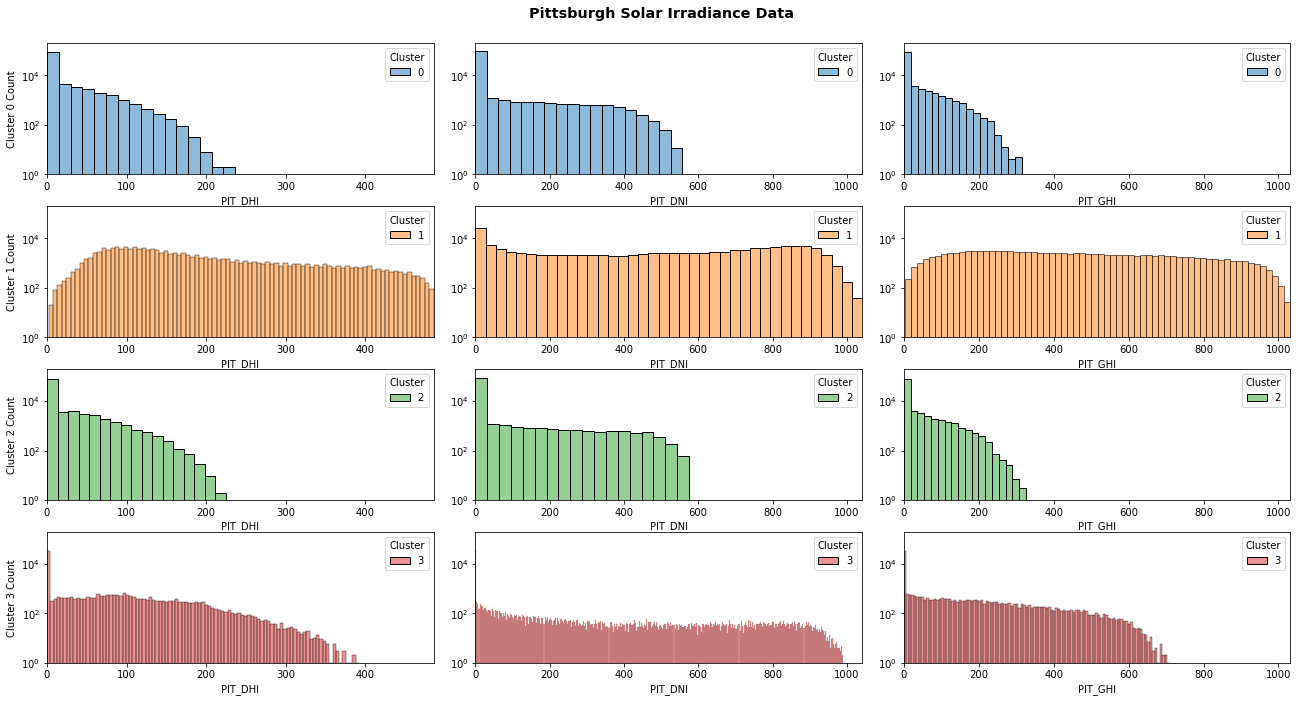

In [37]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18,10))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Pittsburgh Solar Irradiance Data', weight='bold', size='x-large')

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 0], x='PIT_DHI', ax=axs[0,0], palette=["C0"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(DHI_min, DHI_max), ylim=(1,200000), ylabel='Cluster 0 Count')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 0], x='PIT_DNI', ax=axs[0,1], palette=["C0"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(DNI_min, DNI_max), ylim=(1,200000), ylabel='')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 0], x='PIT_GHI', ax=axs[0,2], palette=["C0"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(GHI_min, GHI_max), ylim=(1,200000), ylabel='')

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 1], x='PIT_DHI', ax=axs[1,0], palette=["C1"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(DHI_min, DHI_max), ylim=(1,200000), ylabel='Cluster 1 Count')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 1], x='PIT_DNI', ax=axs[1,1], palette=["C1"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(DNI_min, DNI_max), ylim=(1,200000), ylabel='')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 1], x='PIT_GHI', ax=axs[1,2], palette=["C1"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(GHI_min, GHI_max), ylim=(1,200000), ylabel='')

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 2], x='PIT_DHI', ax=axs[2,0], palette=["C2"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(DHI_min, DHI_max), ylim=(1,200000), ylabel='Cluster 2 Count')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 2], x='PIT_DNI', ax=axs[2,1], palette=["C2"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(DNI_min, DNI_max), ylim=(1,200000), ylabel='')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 2], x='PIT_GHI', ax=axs[2,2], palette=["C2"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(GHI_min, GHI_max), ylim=(1,200000), ylabel='')

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 3], x='PIT_DHI', ax=axs[3,0], palette=["C3"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(DHI_min, DHI_max), ylim=(1,200000), ylabel='Cluster 3 Count')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 3], x='PIT_DNI', ax=axs[3,1], palette=["C3"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(DNI_min, DNI_max), ylim=(1,200000), ylabel='')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 3], x='PIT_GHI', ax=axs[3,2], palette=["C3"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(GHI_min, GHI_max), ylim=(1,200000), ylabel='')

plt.show()

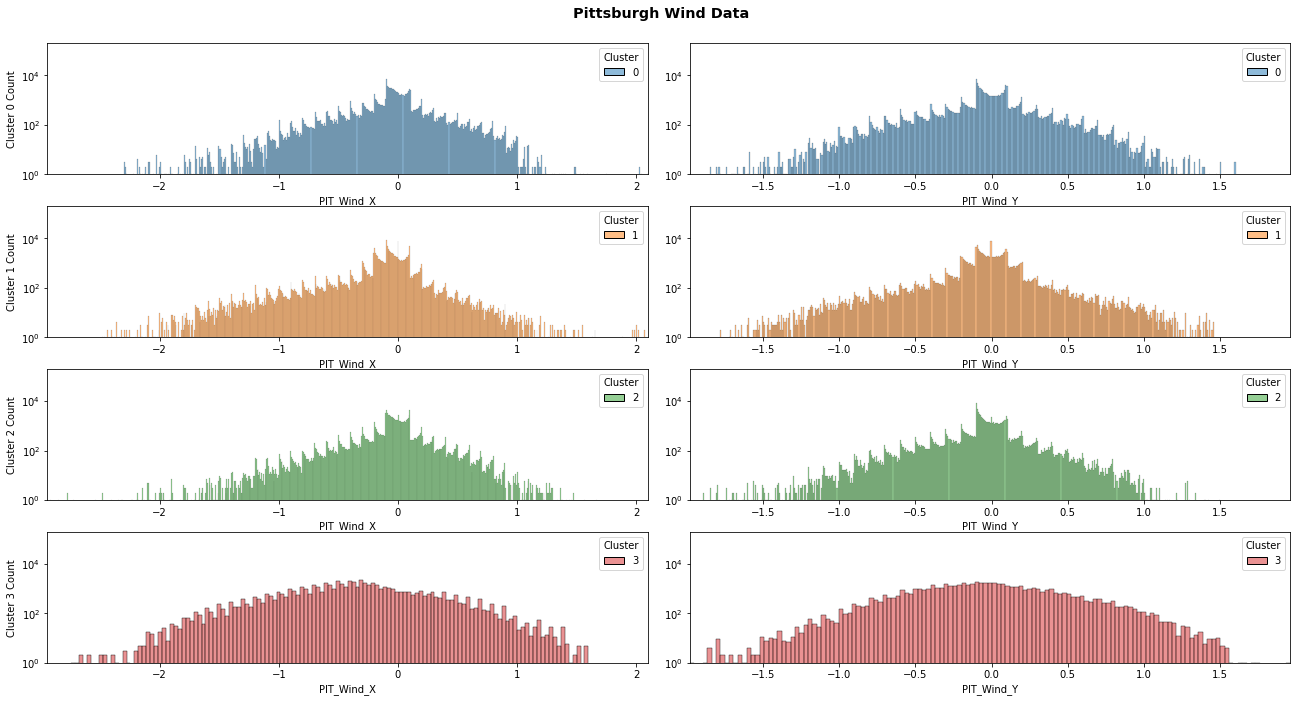

In [38]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18,10))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Pittsburgh Wind Data', weight='bold', size='x-large')

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 0], x='PIT_Wind_X', ax=axs[0,0], palette=["C0"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(Wind_X_min, Wind_X_max), ylim=(1,200000), ylabel='Cluster 0 Count')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 0], x='PIT_Wind_Y', ax=axs[0,1], palette=["C0"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(Wind_Y_min, Wind_Y_max), ylim=(1,200000), ylabel='')

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 1], x='PIT_Wind_X', ax=axs[1,0], palette=["C1"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(Wind_X_min, Wind_X_max), ylim=(1,200000), ylabel='Cluster 1 Count')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 1], x='PIT_Wind_Y', ax=axs[1,1], palette=["C1"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(Wind_Y_min, Wind_Y_max), ylim=(1,200000), ylabel='')

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 2], x='PIT_Wind_X', ax=axs[2,0], palette=["C2"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(Wind_X_min, Wind_X_max), ylim=(1,200000), ylabel='Cluster 2 Count')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 2], x='PIT_Wind_Y', ax=axs[2,1], palette=["C2"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(Wind_Y_min, Wind_Y_max), ylim=(1,200000), ylabel='')

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 3], x='PIT_Wind_X', ax=axs[3,0], palette=["C3"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(Wind_X_min, Wind_X_max), ylim=(1,200000), ylabel='Cluster 3 Count')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 3], x='PIT_Wind_Y', ax=axs[3,1], palette=["C3"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(Wind_Y_min, Wind_Y_max), ylim=(1,200000), ylabel='')
    
plt.show()

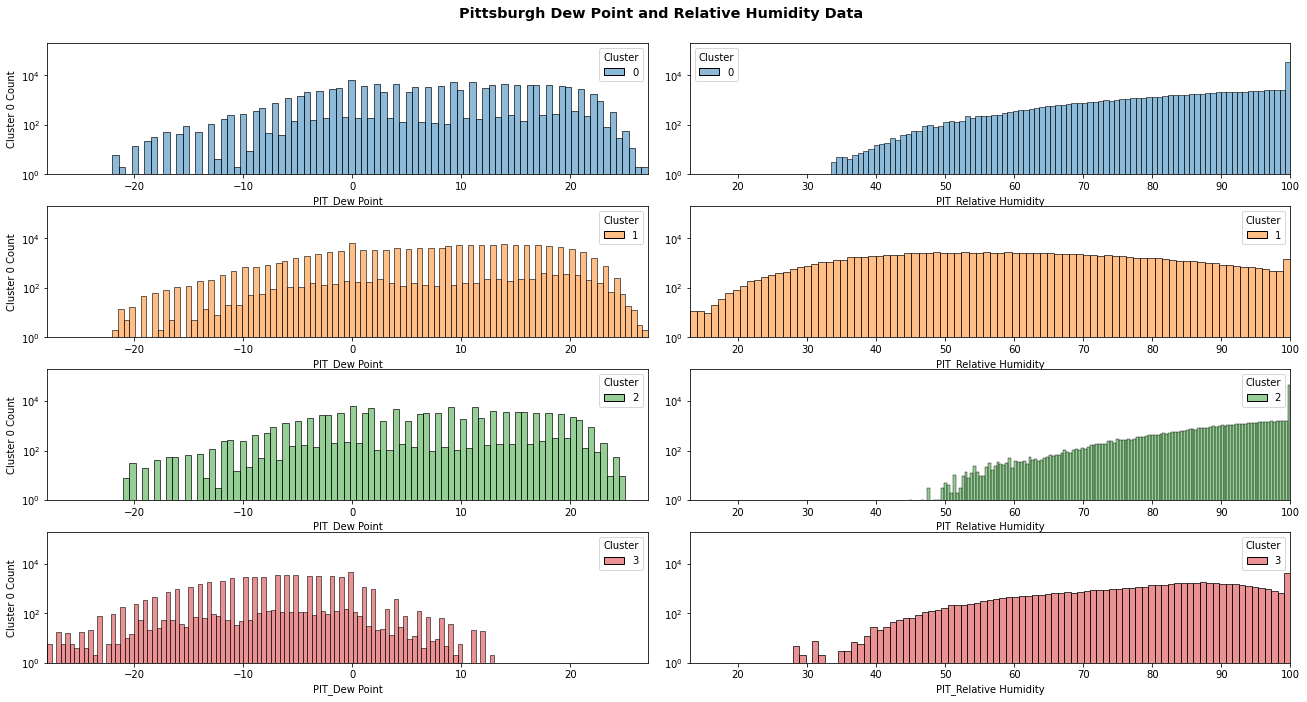

In [40]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18,10))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Pittsburgh Dew Point and Relative Humidity Data', weight='bold', size='x-large')

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 0], x='PIT_Dew Point', ax=axs[0,0], palette=["C0"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(DP_min, DP_max), ylim=(1,200000), ylabel='Cluster 0 Count')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 0], x='PIT_Relative Humidity', ax=axs[0,1], palette=["C0"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(RH_min, RH_max), ylim=(1,200000), ylabel='')

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 1], x='PIT_Dew Point', ax=axs[1,0], palette=["C1"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(DP_min, DP_max), ylim=(1,200000), ylabel='Cluster 0 Count')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 1], x='PIT_Relative Humidity', ax=axs[1,1], palette=["C1"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(RH_min, RH_max), ylim=(1,200000), ylabel='')

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 2], x='PIT_Dew Point', ax=axs[2,0], palette=["C2"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(DP_min, DP_max), ylim=(1,200000), ylabel='Cluster 0 Count')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 2], x='PIT_Relative Humidity', ax=axs[2,1], palette=["C2"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(RH_min, RH_max), ylim=(1,200000), ylabel='')

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 3], x='PIT_Dew Point', ax=axs[3,0], palette=["C3"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(DP_min, DP_max), ylim=(1,200000), ylabel='Cluster 0 Count')
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 3], x='PIT_Relative Humidity', ax=axs[3,1], palette=["C3"], hue='Cluster', log_scale=(False, True))
g.set(xlim=(RH_min, RH_max), ylim=(1,200000), ylabel='')

plt.show()

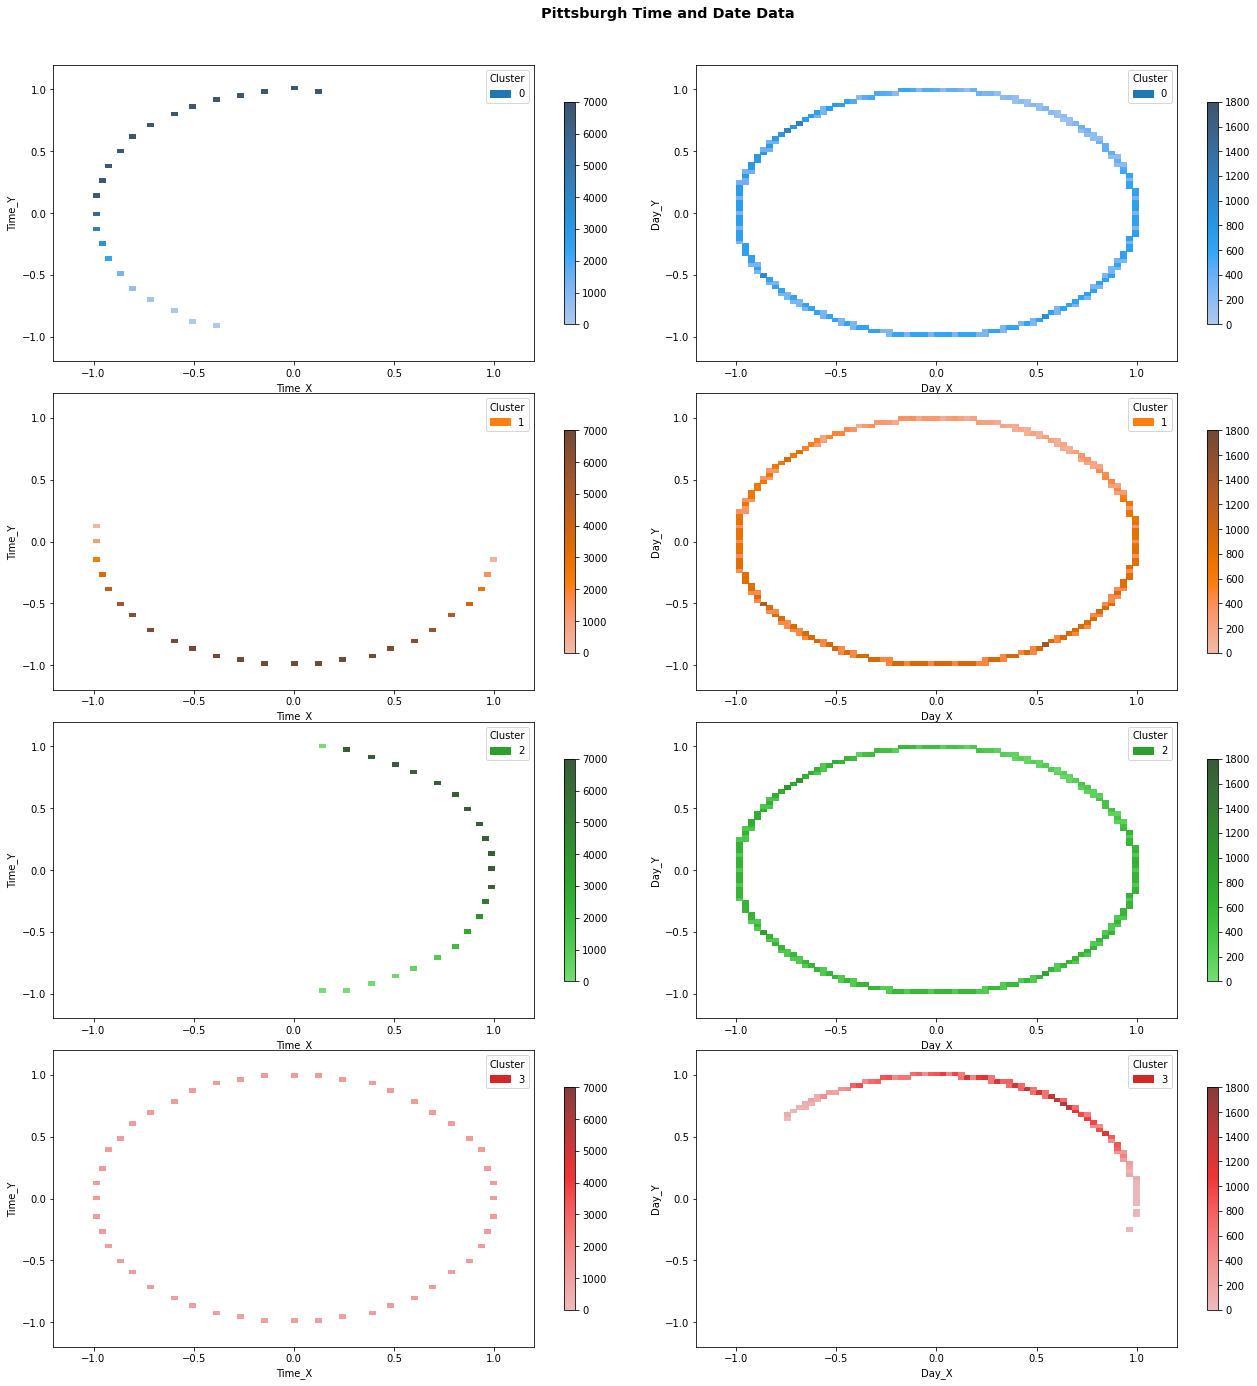

In [89]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18,20))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Pittsburgh Time and Date Data', weight='bold', size='x-large')

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 0], x="Time_X", y="Time_Y", ax=axs[0,0], binwidth=0.03,
               palette = ["C0"], cbar=True, cbar_kws=dict(shrink=.75), vmax=7000, hue='Cluster')
g.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 0], x="Day_X", y="Day_Y", ax=axs[0,1], binwidth=0.03, 
               palette = ["C0"], cbar=True, cbar_kws=dict(shrink=.75), vmax=1800, hue='Cluster')
g.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 1], x="Time_X", y="Time_Y", ax=axs[1,0], binwidth=0.03, 
               palette = ["C1"], cbar=True, cbar_kws=dict(shrink=.75), vmax=7000, hue='Cluster')
g.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 1], x="Day_X", y="Day_Y", ax=axs[1,1], binwidth=0.03, 
               palette = ["C1"], cbar=True, cbar_kws=dict(shrink=.75), vmax=1800, hue='Cluster')
g.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 2], x="Time_X", y="Time_Y", ax=axs[2,0], binwidth=0.03, 
               palette = ["C2"], cbar=True, cbar_kws=dict(shrink=.75), vmax=7000, hue='Cluster')
g.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 2], x="Day_X", y="Day_Y", ax=axs[2,1], binwidth=0.03, 
               palette = ["C2"], cbar=True, cbar_kws=dict(shrink=.75), vmax=1800, hue='Cluster')
g.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))

g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 3], x="Time_X", y="Time_Y", ax=axs[3,0], binwidth=0.03, 
               palette = ["C3"], cbar=True, cbar_kws=dict(shrink=.75), vmax=7000, hue='Cluster')
g.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))
g=sns.histplot(data=PIT_weather[PIT_weather['Cluster'] == 3], x="Day_X", y="Day_Y", ax=axs[3,1], binwidth=0.03, 
               palette = ["C3"], cbar=True, cbar_kws=dict(shrink=.75), vmax=1800, hue='Cluster')
g.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))

plt.show()

On a log scale, it may be a bit difficult to determine the relative sizes of the clusters. We can count how many members are in each cluster and list them.

In [90]:
count_0 = (PIT_weather["Cluster"] == 0).sum()
count_1 = (PIT_weather["Cluster"] == 1).sum()
count_2 = (PIT_weather["Cluster"] == 2).sum()
count_3 = (PIT_weather["Cluster"] == 3).sum()

print(f'Cluster 0 has {count_0:,} members\n\
Cluster 1 has {count_1:,} members\n\
Cluster 2 has {count_2:,} members\n\
Cluster 3 has {count_3:,} members\n')

Cluster 0 has 107,371 members
Cluster 1 has 124,676 members
Cluster 2 has 98,462 members
Cluster 3 has 54,931 members



Now I'm interested in the transition probabilities between clusters over a one-hour time period.

In [91]:
# Transition matrix. Rows are FROM and columns are TO
# hourly_transitions[2, 1] is the number of transitions FROM cluster 2 TO cluster 1
hourly_transitions = np.zeros((4, 4))

for i in range(2, PIT_weather['Cluster'].shape[0]):
    cluster_from = PIT_weather['Cluster'][i-2]
    cluster_to = PIT_weather['Cluster'][i]
    hourly_transitions[cluster_from, cluster_to] += 1

hourly_transitions

array([[9.33000e+04, 1.90000e+01, 1.37240e+04, 3.26000e+02],
       [1.37410e+04, 1.10521e+05, 1.70000e+01, 3.97000e+02],
       [0.00000e+00, 1.37400e+04, 8.47210e+04, 1.00000e+00],
       [3.30000e+02, 3.96000e+02, 0.00000e+00, 5.42050e+04]])

In [92]:
hourly_transitions_norm = hourly_transitions / hourly_transitions.sum(axis=1)[:,None]
np.set_printoptions(suppress=True)
hourly_transitions_norm

array([[0.8689659 , 0.00017696, 0.12782088, 0.00303626],
       [0.11021367, 0.88646572, 0.00013635, 0.00318425],
       [0.        , 0.13954622, 0.86044362, 0.00001016],
       [0.00600754, 0.00720904, 0.        , 0.98678342]])

From this we see that cluster 3 is very likely to transition to itself. The inter-cluster transition with the highest probability is 2 -> 1 followed closely by 0 -> 2.

## Visualization of Hourly Cluster Transitions

The following plot displays the transition probabilities between clusters over an hour. The size of the clusters is proportional to the number of instances in that cluster. The arrow sizes are proportional to the conditional probability of that transition given the initial instance is in the starting cluster.

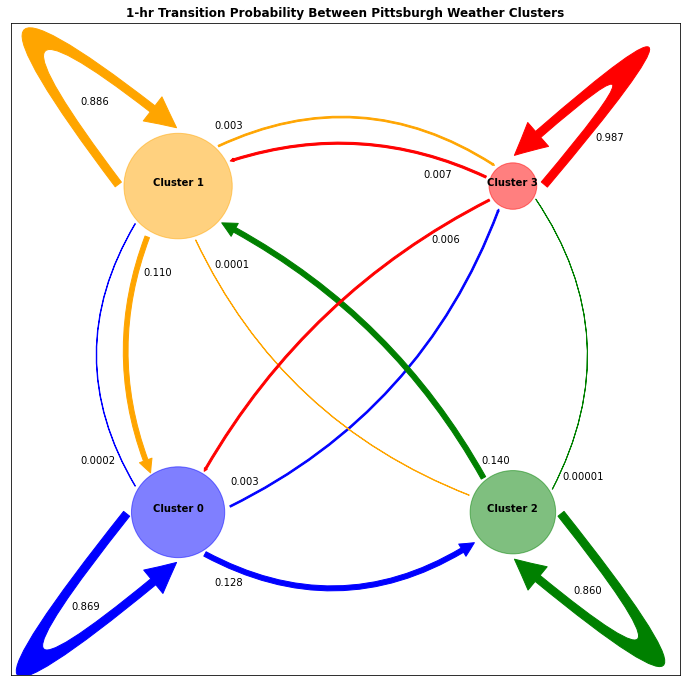

In [185]:
import matplotlib.patches as patches

total_count = count_0 + count_1 + count_2 + count_3
norm_count_0 = count_0/total_count
norm_count_1 = count_1/total_count
norm_count_2 = count_2/total_count
norm_count_3 = count_3/total_count

cluster0 = plt.Circle((0,0), norm_count_0, color='b', alpha=0.5)
cluster1 = plt.Circle((0,2), norm_count_1, color='orange', alpha=0.5)
cluster2 = plt.Circle((2,0), norm_count_2, color='g', alpha=0.5)
cluster3 = plt.Circle((2,2), norm_count_3, color='r', alpha=0.5)

fig, ax = plt.subplots(figsize=(12,12))

ax.add_artist(cluster0)
plt.text(0, 0, "Cluster 0", horizontalalignment='center', fontweight='bold')
ax.add_artist(cluster1)
plt.text(0, 2, "Cluster 1", horizontalalignment='center', fontweight='bold')
ax.add_artist(cluster2)
plt.text(2, 0, "Cluster 2", horizontalalignment='center', fontweight='bold')
ax.add_artist(cluster3)
plt.text(2, 2, "Cluster 3", horizontalalignment='center', fontweight='bold')

tw_mult = 3
hw_mult = 5
hl_mult = 5

from numpy import errstate,isneginf,isinf,array

with errstate(divide='ignore'):
    tw = np.log10(hourly_transitions_norm)
    hw = np.log10(hourly_transitions_norm)
    hl = np.log10(hourly_transitions_norm)


tw[isneginf(tw)] = np.inf
hw[isneginf(hw)] = np.inf
hl[isneginf(hl)] = np.inf

tw += (-(tw.min()) + 1)
hw += (-(hw.min()) + 1)
hl += (-(hl.min()) + 1)

tw[isinf(tw)] = 0
hw[isinf(hw)] = 0
hl[isinf(hl)] = 0

tw = (tw/3)**tw_mult
hw = (hw/3)**hw_mult
hl = (hl/3)**hl_mult

zero_zero= patches.FancyArrowPatch((-0.3, 0), (0, -0.3), color='b',
                                   arrowstyle=f"simple, tail_width={tw[0,0]}, head_width={hw[0,0]}, head_length={hl[0,0]}", 
                                   connectionstyle='arc3,rad=5')
zero_one = patches.FancyArrowPatch((-0.25, 0.15), (-0.25, 1.78), color='b',
                                   arrowstyle=f"simple, tail_width={tw[0,1]}, head_width={hw[0,1]}, head_length={hl[0,1]}", 
                                   connectionstyle='arc3,rad=-0.3')
zero_two = patches.FancyArrowPatch((0.15, -0.25), (1.78, -0.18), color='b',
                                   arrowstyle=f"simple, tail_width={tw[0,2]}, head_width={hw[0,2]}, head_length={hl[0,2]}", 
                                   connectionstyle='arc3,rad=0.3')
zero_three = patches.FancyArrowPatch((0.3, 0.03), (1.92, 1.87), color='b',
                                   arrowstyle=f"simple, tail_width={tw[0,3]}, head_width={hw[0,3]}, head_length={hl[0,3]}", 
                                   connectionstyle='arc3,rad=0.2')

one_zero= patches.FancyArrowPatch((-0.18, 1.7), (-0.16, 0.23), color='orange',
                                   arrowstyle=f"simple, tail_width={tw[1,0]}, head_width={hw[1,0]}, head_length={hl[1,0]}", 
                                   connectionstyle='arc3,rad=0.2')
one_one = patches.FancyArrowPatch((-0.35, 2), (0, 2.35), color='orange',
                                   arrowstyle=f"simple, tail_width={tw[1,1]}, head_width={hw[1,1]}, head_length={hl[1,1]}", 
                                   connectionstyle='arc3,rad=-4')
one_two = patches.FancyArrowPatch((0.1, 1.68), (1.75, 0.1), color='orange',
                                   arrowstyle=f"simple, tail_width={tw[1,2]}, head_width={hw[1,2]}, head_length={hl[1,2]}", 
                                   connectionstyle='arc3,rad=0.2')
one_three = patches.FancyArrowPatch((0.23, 2.24), (1.9, 2.12), color='orange',
                                   arrowstyle=f"simple, tail_width={tw[1,3]}, head_width={hw[1,3]}, head_length={hl[1,3]}", 
                                   connectionstyle='arc3,rad=-0.28')

two_zero= patches.FancyArrowPatch((1.6, -0.3), (0.12, -0.08), color='g',
                                   arrowstyle=f"simple, tail_width={tw[2,0]}, head_width={hw[2,0]}, head_length={hl[2,0]}", 
                                   connectionstyle='arc3,rad=-0.2')
two_one = patches.FancyArrowPatch((1.83, 0.2), (0.25, 1.78), color='g',
                                   arrowstyle=f"simple, tail_width={tw[2,1]}, head_width={hw[2,1]}, head_length={hl[2,1]}", 
                                   connectionstyle='arc3,rad=0.15')
two_two = patches.FancyArrowPatch((2.28, 0), (2, -0.28), color='g',
                                   arrowstyle=f"simple, tail_width={tw[2,2]}, head_width={hw[2,2]}, head_length={hl[2,2]}", 
                                   connectionstyle='arc3,rad=-5')
two_three = patches.FancyArrowPatch((2.23, 0.13), (2.13, 1.93), color='g',
                                   arrowstyle=f"simple, tail_width={tw[2,3]}, head_width={hw[2,3]}, head_length={hl[2,3]}", 
                                   connectionstyle='arc3,rad=0.3')

three_zero= patches.FancyArrowPatch((1.87, 1.92), (0.15, 0.24), color='r',
                                   arrowstyle=f"simple, tail_width={tw[3,0]}, head_width={hw[3,0]}, head_length={hl[3,0]}", 
                                   connectionstyle='arc3,rad=0.15')
three_one = patches.FancyArrowPatch((1.85, 2.05), (0.3, 2.15), color='r',
                                   arrowstyle=f"simple, tail_width={tw[3,1]}, head_width={hw[3,1]}, head_length={hl[3,1]}", 
                                   connectionstyle='arc3,rad=0.2')
three_two = patches.FancyArrowPatch((2.04, 1.79), (2.1, 0.48), color='r',
                                   arrowstyle=f"simple, tail_width={tw[3,2]}, head_width={hw[3,2]}, head_length={hl[3,2]}", 
                                   connectionstyle='arc3,rad=-0.2')
three_three = patches.FancyArrowPatch((2.18, 2), (2, 2.18), color='r',
                                   arrowstyle=f"simple, tail_width={tw[3,3]}, head_width={hw[3,3]}, head_length={hl[3,3]}", 
                                   connectionstyle='arc3,rad=7')

plt.text(-0.55, -0.6, f'{hourly_transitions_norm[0,0]:.3f}', horizontalalignment='center')
plt.text(-0.48, 0.3, f'{hourly_transitions_norm[0,1]:.4f}', horizontalalignment='center')
plt.text(0.3, -0.45, f'{hourly_transitions_norm[0,2]:.3f}', horizontalalignment='center')
plt.text(0.4, 0.17, f'{hourly_transitions_norm[0,3]:.3f}', horizontalalignment='center')

plt.text(-0.12, 1.45, f'{hourly_transitions_norm[1,0]:.3f}', horizontalalignment='center')
plt.text(-0.5, 2.5, f'{hourly_transitions_norm[1,1]:.3f}', horizontalalignment='center')
plt.text(0.32, 1.5, f'{hourly_transitions_norm[1,2]:.4f}', horizontalalignment='center')
plt.text(0.3, 2.35, f'{hourly_transitions_norm[1,3]:.3f}', horizontalalignment='center')

plt.text(1.9, 0.3, f'{hourly_transitions_norm[2,1]:.3f}', horizontalalignment='center')
plt.text(2.45, -0.5, f'{hourly_transitions_norm[2,2]:.3f}', horizontalalignment='center')
plt.text(2.42, 0.2, f'{hourly_transitions_norm[2,3]:.5f}', horizontalalignment='center')

plt.text(1.6, 1.65, f'{hourly_transitions_norm[3,0]:.3f}', horizontalalignment='center')
plt.text(1.55, 2.05, f'{hourly_transitions_norm[3,1]:.3f}', horizontalalignment='center')
plt.text(2.58, 2.28, f'{hourly_transitions_norm[3,3]:.3f}', horizontalalignment='center')

for a in [zero_zero, zero_one, zero_two, zero_three, one_zero, one_one, one_two, one_three, 
          two_zero, two_one, two_two, two_three, three_zero, three_one, three_two, three_three]:
    plt.gca().add_patch(a)

ax.set(xlim=(-1, 3), ylim=(-1, 3))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.title('1-hr Transition Probability Between Pittsburgh Weather Clusters', fontweight='bold')
plt.show()